# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


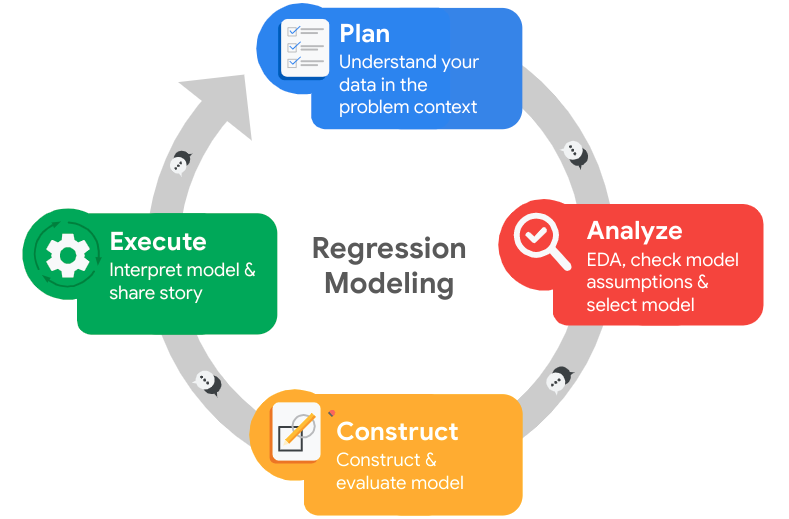

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders are the HR department for Saliport Motors, the staff and management of the company.

The objective is to use a model to predict wether a staff will leave or stay with the company.

The data has variables that relate to staff activity, incidents, history, performance metrics and salary.

I intend to use regression and XGboost machine learning models to gain the predictive capability that to achieve the business objective

A possible ethical issue is how staff are either re-assigned or able to continue doing thier jobs after an accident.
If staff skill sets cannot benefit the organisation much after anr accident this will  lead to less output, lower performance metrics, lower salary or less promotions and ultimately they may leave.
This variable i n particular is more sensitive and may require some discussion/consideration and not only use a statistical/scientific analysis or model to place peaople in generalised groups.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

I am importing packages for a decsion tree classification

In [19]:
# Import packages
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay


import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [20]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [3]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# Rename columns as needed

# renaming satisfactio_level as numer_projects as Projects
df0.rename(columns = {'number_project':'Projects'}, inplace = True)

# renaming  'average_montly_hours' as average_monthly_hrs
df0.rename(columns = {'average_montly_hours':'average_monthly_hrs'}, inplace = True)


# renaming  time_spend_company as Years
df0.rename(columns = {'time_spend_company':'Tenure'}, inplace = True)

# renaming Work_accident as Accident
df0.rename(columns = {'Work_accident':'Accidents'}, inplace = True)

# renaming left as Churn
df0.rename(columns = {'left':'Churn'}, inplace = True)

# renaming promotion_last_5years as Churn Promotion
df0.rename(columns = {'promotion_last_5years':'Promotion'}, inplace = True)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'Projects',
       'average_monthly_hrs', 'Tenure', 'Accidents', 'Churn', 'Promotion',
       'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isnull().values.any()

False

There are no missing values

### Check duplicates

Check for any duplicate entries in the data.

In [5]:
# Check for duplicates
df0.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [6]:
df0.shape

(14999, 10)

In [22]:
# Inspect some rows containing duplicates as needed

dupdf = df0[df0.duplicated()]

dupdf.head(5)

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accidents,Churn,Promotion,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
dupdf.shape

(3008, 10)

In [10]:
14999 -3008 

11991

11991 rows are expected to remain after duplicates are dropped

In [23]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first') 

# Display first few rows of new dataframe as needed
df1.head(5)


,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accidents,Churn,Promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

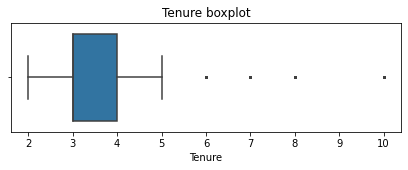

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(7,2))
plt.title('Tenure boxplot')
sns.boxplot(x=df1['Tenure'], fliersize=1);



In [46]:
iqrl = 3-(1.5*(4-3))
iqrl

1.5

In [47]:
iqrh = 3+(1.5*(4-3))
iqrh

1.5

In [48]:
# Tenure extreemly high values should not be more than mean plus 1.5 ie

outlimit = df1['Tenure'].mean() + 1.5
outlimit 

4.864856976065383

In [63]:
# Determine the number of rows containing outliers
outl = df1[df1['Tenure'] > 5]

outl

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accidents,Churn,Promotion,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [64]:
outl.shape

(824, 10)

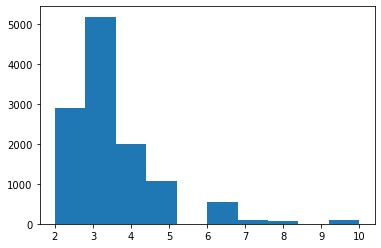

In [143]:
plt.hist(df1['Tenure'])
plt.show()

Some staff have been in the company relatively longer ie 824 staff (824 rows contain outliers) compared to the rest,  

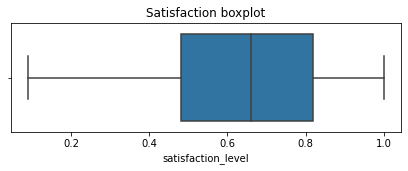

In [234]:
# checking for other variables

# box plot for satisfaction
plt.figure(figsize=(7,2))
plt.title('Satisfaction boxplot')
sns.boxplot(x=df1['satisfaction_level'], fliersize=1);

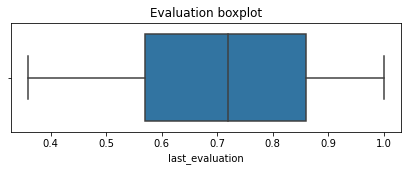

In [123]:
# box plot for last_evaluation
plt.figure(figsize=(7,2))
plt.title('Evaluation boxplot')
sns.boxplot(x=df1['last_evaluation'], fliersize=1);

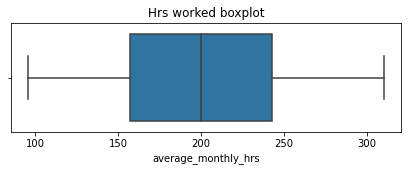

In [127]:
# box plot for average_monthly_hrs
plt.figure(figsize=(7,2))
plt.title('Hrs worked boxplot')
sns.boxplot(x=df1['average_monthly_hrs'], fliersize=1);

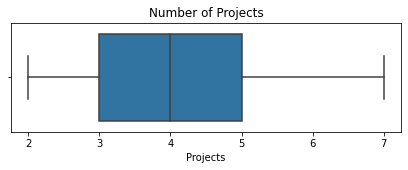

In [128]:
# box plot for Number of Projects
plt.figure(figsize=(7,2))
plt.title('Number of Projects')
sns.boxplot(x=df1['Projects'], fliersize=1);

In [225]:
df1.describe()

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accident,Churn,Promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


I will us the decions tree model becuase they are not sensitive to outliers since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values.


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




What did you observe about the relationships between variables?.

There is some possible inter-relationships between the variables 
eg is the longer a staff stays in the company,
most probably they will have done more projects

What do you observe about the distributions in the data?

The data seems to be normallly distributed in general though this will be accesses further

What transformations did you make with your data? Why did you chose to make those decisions?

I will create dummy variables for the categorical variables ie salary.
I will consider dropping department if the hypothesis that it does not have any relationship to determine the churn is not rejected.


What are some purposes of EDA before constructing a predictive model?

EDA helps to assess wether teh data is adequate to model or requires some feature enginnering 


What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

I mainly used medium  and stack overlfow to help confirm the codes and the rationale of processed I used

https://tariqueakhtar-39220.medium.com/log-transformation-and-visualizing-it-using-python-392cb4bcfc74

https://stackoverflow.com/

Do you have any ethical considerations in this stage?

I would considered wether there are accidents prone to some departments for example.
This would have led to some bias in the Churn decision of the staff as also bias in the analaysis.
As shown below, those in the Sales, Technical and support roles experience more accidents and churn more.

I would also consider wether some departments have more promotions than others.

Wether some departments a paid more than others.

Also wether some departments have more staff leaving than others.

However I would consider doing the analysis without using \department as an independent variable.
This is because some factors may be closely related to the type of department a person works in.
An example is for a technologhy driven company, those in It will probably earn more than those in HR.
Again those who do feild work such as technicians will be prone to accidents more than those in HR.

In [9]:
df1['Accidents'].value_counts()

0    10141
1     1850
Name: Accidents, dtype: int64

In [16]:
# comparing Accident to Department
accs= df1[df1['Accidents']==1]

acc_df = accs.groupby(['Department']).count()[['Accidents']]

acc_df

,Accidents
Department,
IT,139
RandD,119
accounting,87
hr,80
management,72
marketing,108
product_mng,109
sales,498
support,299


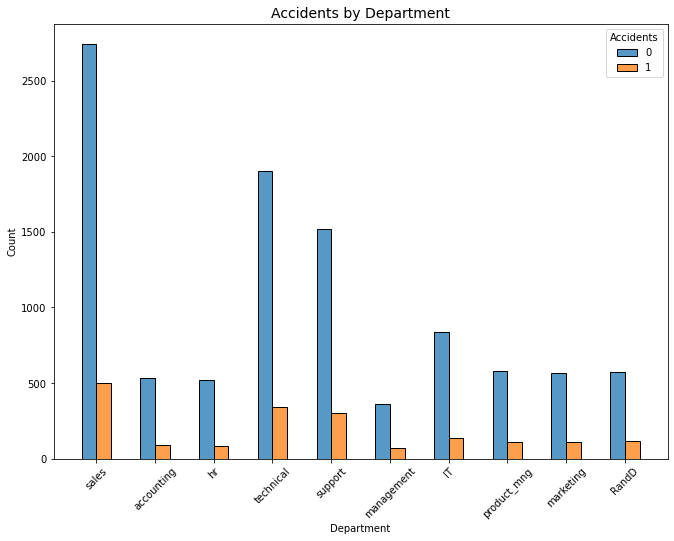

In [78]:
# repersent in grapgh
#sns.histplot(data = accs, x = ["Accidents"], hue = "Department" )

plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='Accidents', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Accidents by Department', fontsize=14);

The concept of occupational hazard is quite depicted here.
Technical, support and sales have higher accidentsThose in the sales, support, technical departments have higher accidents.


In [11]:
# comparing Accident to Department
churndf = df1[df1['Churn']==1]

c_df = churndf.groupby(['Department']).count()[['Churn']]

c_df

,Churn
Department,
IT,158
RandD,85
accounting,109
hr,113
management,52
marketing,112
product_mng,110
sales,550
support,312


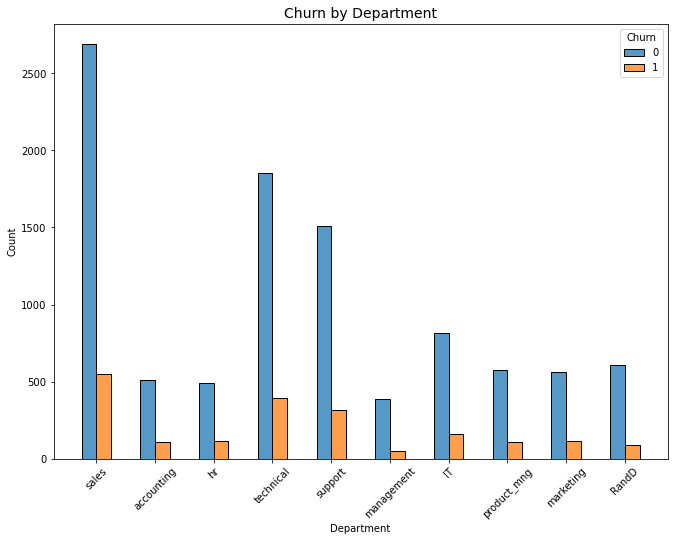

In [76]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='Churn', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Churn by Department', fontsize=14);

Again, those in the sales, support, technical departments have higher Churn


The data is skewwed in regards to Churn which seems to affect some departments more than others

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [37]:
df1['Churn'].value_counts()

0    10000
1     1991
Name: Churn, dtype: int64

In [38]:
# Get percentages of people who left vs. stayed

df1['Churn'].value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: Churn, dtype: float64

The data is not as balanced as required and may adversely affect the model performance in predicting if a staff will leave.

16% of staff left the company ie churned
this needs to be compared with the HR policy regarding churn rate that is acceptable to the company 
(which generally is 5% but could be different industry wise)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [39]:
# Promotions in Departments 
promdf = df1[df1['Promotion']==1]

prdep = promdf.groupby(['Department']).count()[['Promotion']]
prdep

,Promotion
Department,
IT,2
RandD,21
accounting,10
hr,11
management,36
marketing,27
sales,58
support,16
technical,22


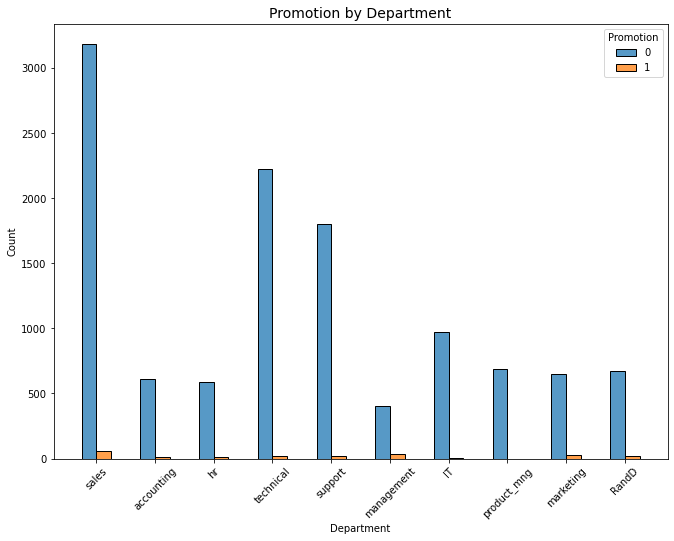

In [83]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='Promotion', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Promotion by Department', fontsize=14);

Sales and Management have the highest promotion. IT is signficanlty lower

In [80]:
# Projects in Departments 


proj_deps = df1.groupby(['Department']).sum()[['Projects']]
proj_deps 

,Projects
Department,
IT,3706
RandD,2672
accounting,2381
hr,2209
management,1673
marketing,2504
product_mng,2603
sales,12234
support,6958


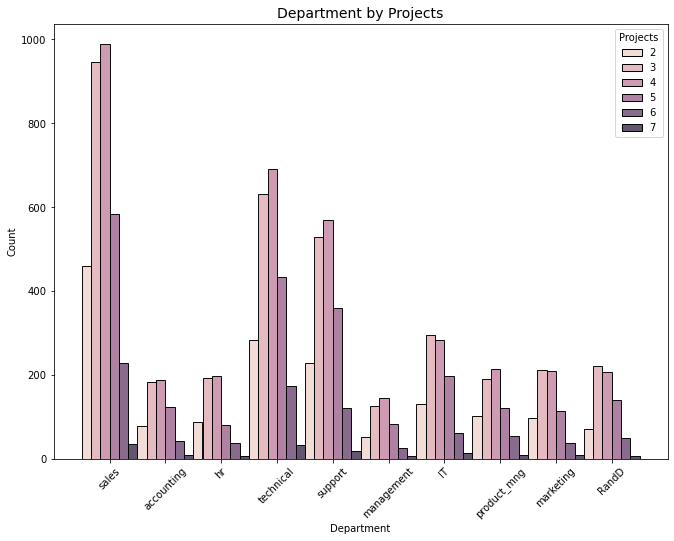

In [82]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='Projects', multiple='dodge')
plt.xticks(rotation='45')
plt.title('Department by Projects', fontsize=14);

In [ ]:
The sales department staff do the most projects that could indicate why they are promoted more

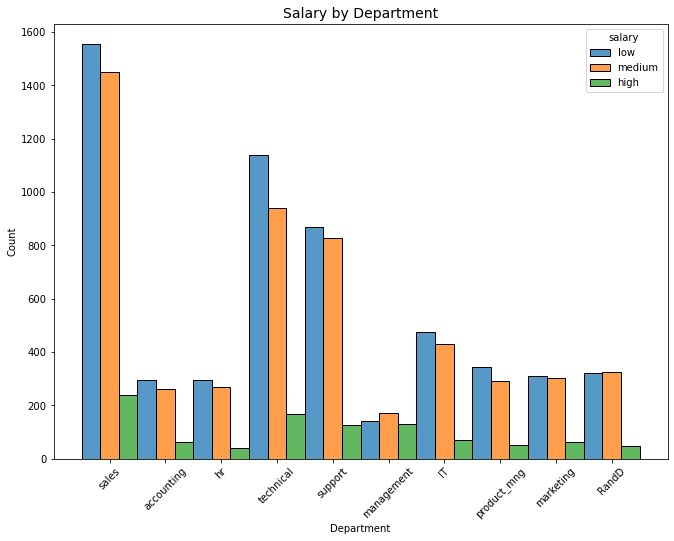

In [85]:
# Salary to department graph

plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='salary',hue_order = ['low','medium','high'], multiple='dodge')
plt.xticks(rotation='45')
plt.title( 'Salary by Department', fontsize=14);

Staff in the sales, suppor, technical and management earn higher salaries compared to other departments

In [48]:
#  considering how many hours people work per department

dephrs = df1.groupby(['Department']).mean()[['average_monthly_hrs']]
dephrs

,average_monthly_hrs
Department,
IT,200.638320
RandD,201.291066
accounting,200.877617
hr,199.371048
management,201.529817
marketing,199.487370
product_mng,198.893586
sales,200.242050
support,200.627128


Staff in all departments work similar number of hours

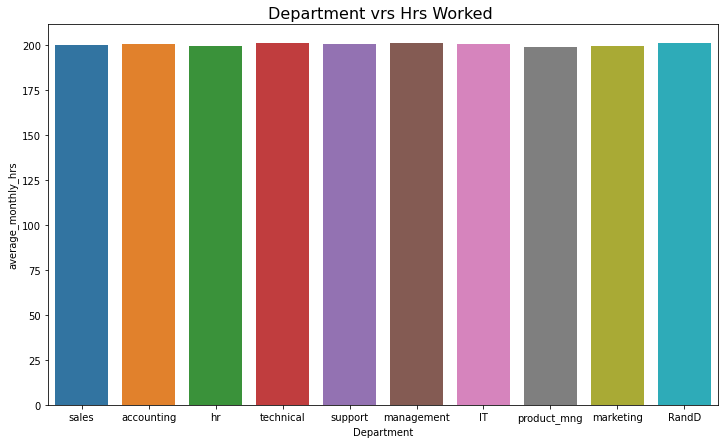

In [50]:

# hrs to department graph


plt.figure(figsize=(12,7))
ax = sns.barplot(x=df1['Department'], y=df1['average_monthly_hrs'], ci=False)
plt.title('Department vrs Hrs Worked ', fontsize=16);

In [53]:
# Considering salary vrs satisfaction (this will be cummulative points)

salsat = df1.groupby(['salary']).mean()[['satisfaction_level']]
salsat

,satisfaction_level
salary,
high,0.643343
low,0.622655
medium,0.634723


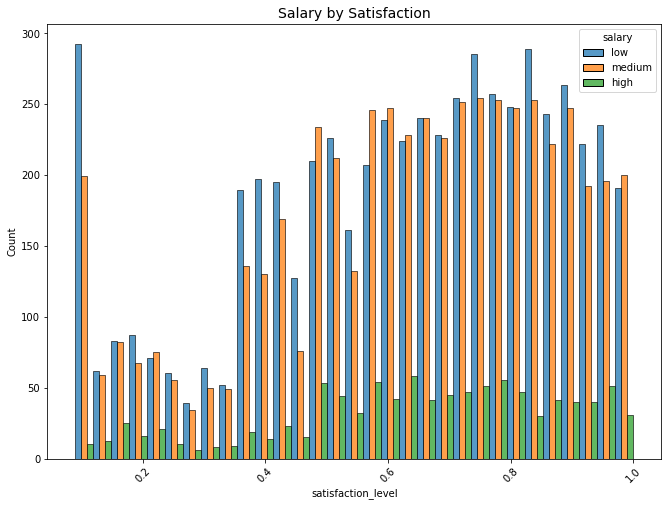

In [95]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='satisfaction_level', hue='salary',hue_order = ['low','medium','high'], multiple='dodge')
plt.xticks(rotation='45')
plt.title( 'Salary by Satisfaction', fontsize=14);

Salary does not becessarily have any major influence on satisfaction. 
In total its the same for all categories though for high saaried workers, satisfaction is significanlty more at a higher level.
ie satisfaction is not normalised accross any category of salary.

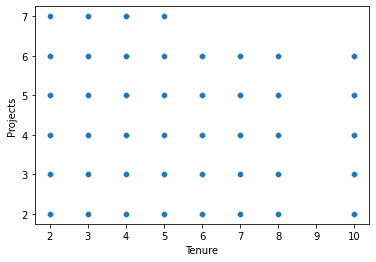

In [25]:
# compary wether projects increase with Tenure

sns.scatterplot(x = df1['Tenure'], y = df1['Projects'] )

Some staff who joined more rcently have done more projects. 
This means projects may not be allocated in a systematic chronological manner.
They may be allocated based on domain knowledge and experience.
They may also be specialised projects which have different time frames 
eg 2 year projects alloacted to some staff and 5 year projects alloacted to others.

In [31]:
# checking how many projects thise who churned did vrs those who did not 

churn_proj = df1.groupby(['Churn']).mean()[['Projects']]

churn_proj

,Projects
Churn,
0,3.786800
1,3.883476


There is not much diiferent regarding the number of projects for those who churned or otherwise.
If there was, it could be an indicator that some staff were not motivated and hence churned but this is not the case.

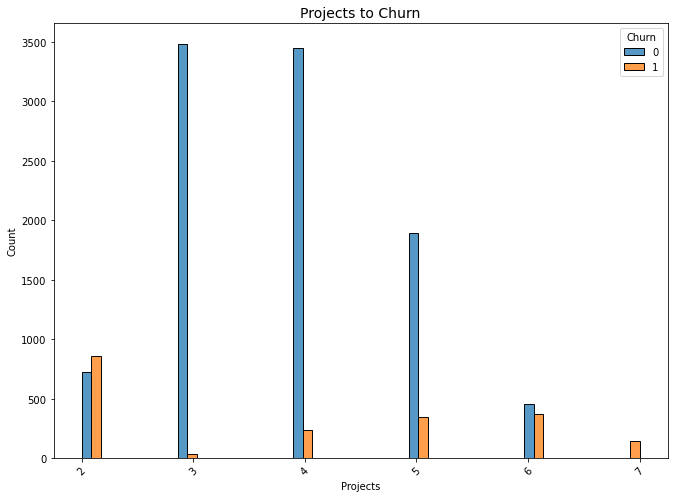

In [96]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Projects', hue='Churn',hue_order = [0,1], multiple='dodge')
plt.xticks(rotation='45')
plt.title( 'Projects to Churn', fontsize=14);

Churn is more common for with only 2 projects but also increases for those with 5 and 6 projects

In [ ]:
Churn is more common for those with lower salaries

In [58]:
# checking Tenure to Churn

c_ten = df1.groupby(['Churn']).mean()[['Tenure']]

c_ten

,Tenure
Churn,
0,3.262000
1,3.881467


There is not much difference between regarding tenure to churn

In [59]:
# checking Tenure to Department

Dep_ten = df1.groupby(['Department']).mean()[['Tenure']]

Dep_ten

,Tenure
Department,
IT,3.350410
RandD,3.319885
accounting,3.404187
hr,3.256240
management,3.981651
marketing,3.421991
product_mng,3.341108
sales,3.380673
support,3.292696


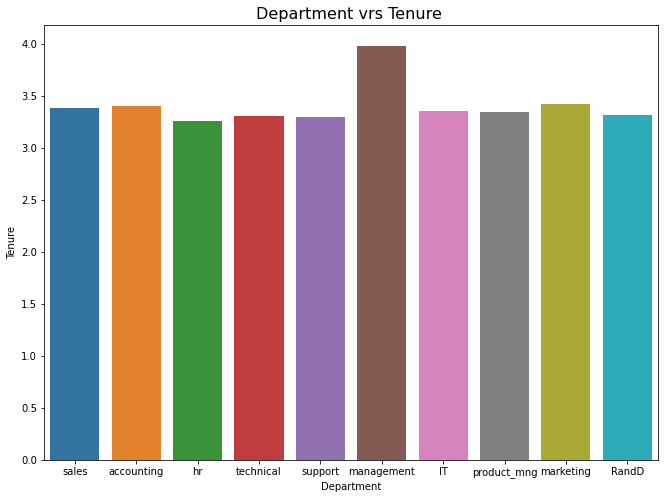

In [97]:
plt.figure(figsize=(11,8))
ax = sns.barplot(x=df1['Department'], y=df1['Tenure'], ci=False)
plt.title('Department vrs Tenure ', fontsize=16);

All staff in the company staff an average of 3 years. 
Rationally manager is slighlty higher as mostly a person will spend more years in a comoany before being promotged to management.
This could also be explained when the founders are in management as well.

In [71]:
# Satisfaction in Departments 

sat_dep = df1.groupby(['Department']).sum()[['satisfaction_level']]
sat_dep

,satisfaction_level
Department,
IT,618.80
RandD,435.26
accounting,377.53
hr,373.79
management,275.55
marketing,427.20
product_mng,432.06
sales,2044.94
support,1156.01


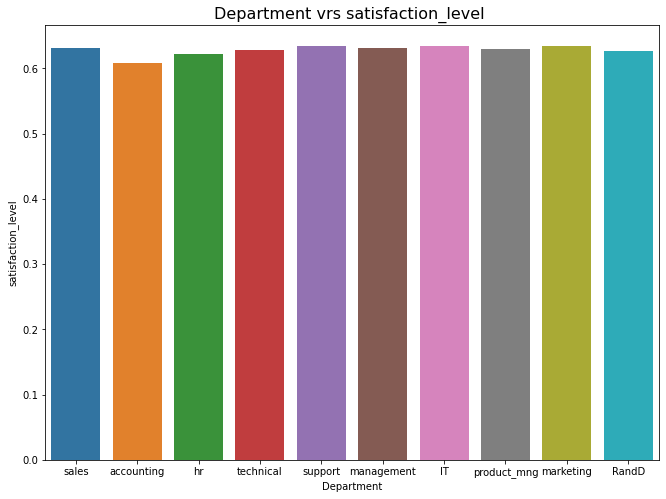

In [98]:
plt.figure(figsize=(11,8))
ax = sns.barplot(x=df1['Department'], y=df1['satisfaction_level'], ci=False)
plt.title('Department vrs satisfaction_level ', fontsize=16);

Contrary to the churn indication, staff in the technical, 
support and sales departments have higher cummulative satifaction scores.

In [65]:
# checking wether staff leave becuase they may not be satisfied

Sat_churn = df1.groupby(['Churn']).sum()[['satisfaction_level']]

Sat_churn

,satisfaction_level
Churn,
0,6673.65
1,876.58


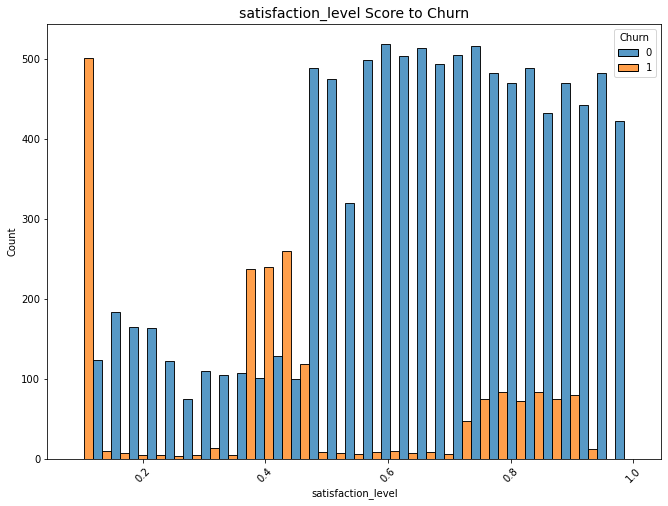

In [101]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='satisfaction_level', hue='Churn',hue_order = [0,1], multiple='dodge')
plt.xticks(rotation='45')
plt.title( 'satisfaction_level Score to Churn', fontsize=14);

Those who churned recorded less cummulative satisfaction 
ie those who stayed had a cummulative satisfaction score of approx 8 times (7.6) than those who churned.

However, even though some staff had high satisfaction_level scores, they still churned.

This signals that externall factors not included in the data can influence churn. Eg new opportunities ore relocation.

In [60]:
df1.head(5)

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accidents,Churn,Promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [66]:
# checking evaulation to churn

ev_churn = df1.groupby(['Churn']).sum()[['last_evaluation']]

ev_churn

,last_evaluation
Churn,
0,7156.67
1,1437.07


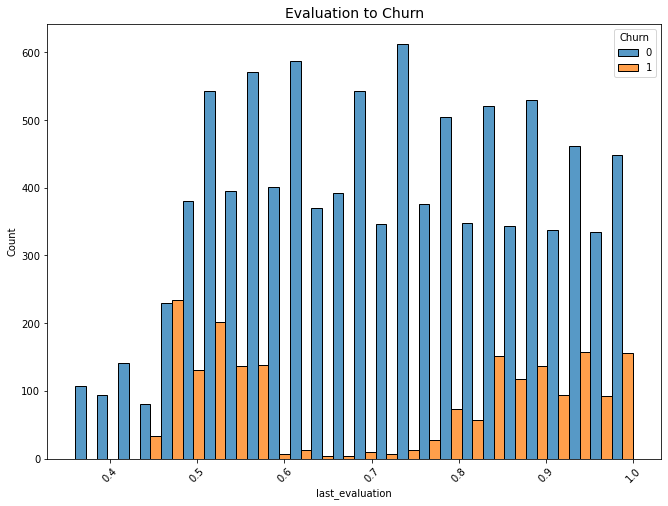

In [99]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='last_evaluation', hue='Churn',hue_order = [0,1], multiple='dodge')
plt.xticks(rotation='45')
plt.title( 'Evaluation to Churn', fontsize=14);

In [ ]:
Some of those who churned had lower evaluations than those who stayed. 
ie those who stayed had a cummulative evaluation score of 5 times (4.98) more than those who churned.
However per the graph, the evaluation score is evenely distributed across those who churn and those who did not.

In [71]:
# Create pairwise scatterplots of data set including only the continous data as the rest are boolean and categorical
pp_df = df1[["satisfaction_level","last_evaluation","Projects","average_monthly_hrs","Tenure"]]


In [77]:
pp_df.head(5)

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


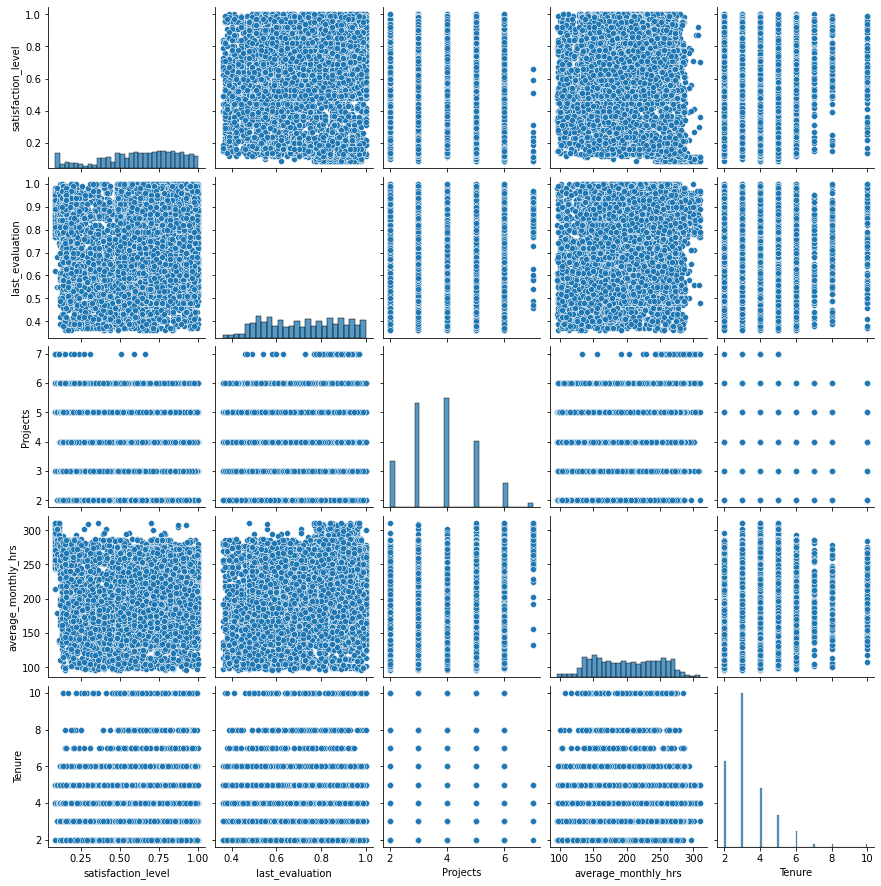

In [78]:
sns.pairplot(pp_df)

None of the variables seem to have any strong correlation amongst themselves

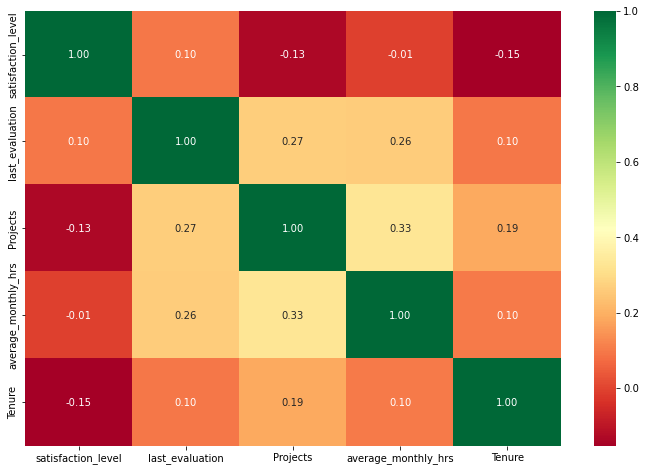

In [72]:
# confirming witha heat map
plt.figure(figsize=(12, 8))
sns.heatmap(pp_df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')

The variables that have some correlation (0.3) are avergae monthly hrs vrs projects. 
But this is not significant as a correlation above 0.5 is strong.
This is rational as working on a current project will result in more hours at work.


In [ ]:
From the analysis above, the main predictors will include:
last_evaluation
satisfaction_level
salary
Promotion
Projects
average_monthly_hrs
Tenure

MODEL DEVELOPMENT

I will use a regression model with Churn as the target variable to be predicted
I will drop the department variable as I have already establishhed that there is 
some occupational hazard with some specific departments
salary will be converted into dummy variables low, medium and high

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task is to predict Churn (wether or not a staff will leave the company). 
The other variables will be independent predictor variables.

### Identify the types of models most appropriate for this task.

Multiple regression model comes to mind first however, the actual percentage of staff who churned is only 16%.
This means some learning challenge might influence the performance.

Also the Tenure data has outliers, depending on how this is handled, there wiill be an effect on model performance.
lastly, some indicators seem to be as correlated as expected;

eg churn data shows that 
1 Sales, support and technical staff churn more
2 the same group of staff experience most accidents
3 Apart form the Sales staff, the rest are not promoted as much
4 Also those who churn are expecteedly less satisfied
5 salary does not seem to have any effect on satisfaction
6 satifaction does not seem to have any correlation with Tenure as well
7 The number of projects does not correlate with tenure as well 

However the staff who have the highest cummulative satisfaction indicator are the same group of staff: 
Sales, support and technical 

This suggest some other factors may come to play in determining satisfaction and hence churn. 
eg a competitor may be poaching the staff hence there is an external influence and so not all the internal company dat may be able to explain churn.

The metrics for scoring satisfaction can also be looked at to include a major predictor in the analysis. This could improve the model.

Based on these I will use a decision tree to learn the data pattern and predict churn.


### Modeling

Add as many cells as you need to conduct the modeling process.

In [68]:
df1.head(5)

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accidents,Churn,Promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [103]:
df_nodep = df1.copy()

In [104]:
df_nodep.head(5)

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accidents,Churn,Promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [105]:
# get dummy varibales for the salary categorical variable
df_nodep = pd.get_dummies(df_nodep, drop_first=True)


In [106]:
df_nodep.head(5)

,satisfaction_level,last_evaluation,Projects,average_monthly_hrs,Tenure,Accidents,Churn,Promotion,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [107]:
# decison tree model development

# Define the y (target) variable
y = df_nodep['Churn']

# Define the X (predictor) variables
X = df_nodep.copy()
X = X.drop('Churn', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=42)




In [108]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)


In [109]:
# Fit the model to training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [110]:
# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [111]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))
 

Accuracy: 0.968
Precision: 0.894
Recall: 0.914
F1 Score: 0.904


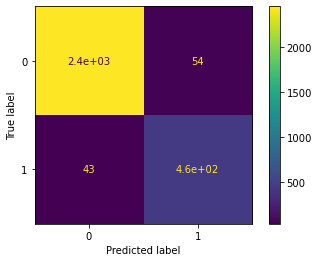

In [112]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

The model is quite accurate as only 98 values were mistakes in predictions.
However one must be weary of overfitting when trying to improve the model when its around 90+% accurate

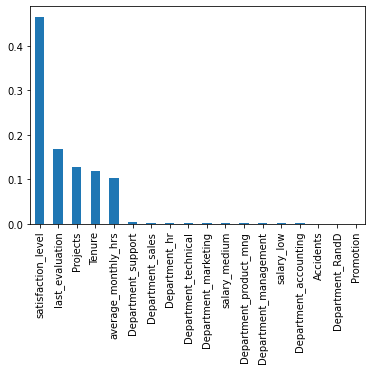

In [113]:
# PLOT FEATURE IMPORTANCE
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

From the feature importance, we can see that the most important features in determining churn are:

1 satisfaction_level (the most important)
2 last_evaluation
3 Projects
3 average_monthly_hrs
4 Tenure

in that order

It is then imperative to ascertain the metrics used to access the satisfaction_level score 
reported by staff and how they are reported by staff.

In [114]:
# we can use the best_estimator_ attribute to inspect the hyperparameter values that yielded the highest 
# F1 score during cross-validation.

# the cuurent f1 score is 90.5

# get a range of parameters

tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}






In [115]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [116]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 0)


In [117]:
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")



In [118]:
# Fit the model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50]

In [119]:
# get the best model
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

The best model estimators are:

max_depths = 8

min_samples_leaf=2

min_samples_split=2

In [120]:
# saving the model best parameters

salifort_clasf_dt_best_para = clf.best_estimator_



In [121]:
salifort_clasf_dt_best_para

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

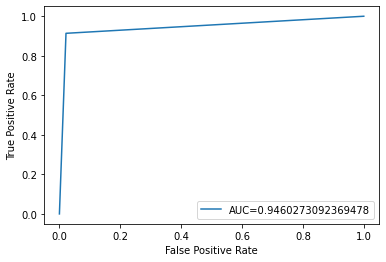

In [122]:
# Getting the ROC curve and AUC score to ascertqin model performance in terms of learning rates.

y_pred_proba = decision_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


The line/curve 'hugs' the top left corner of the graph indicating the model performance is high in classifying churn.

To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve.

The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.
The AUC in this case is 0.94 which means teh model is quite good.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Randome Tree model performace is as below

Accuracy: 96.8%
Precision:90.1%
Recall:   90.1%
F1 Score: 90.5%
AUC:      0.94  

The accuracy of 96.8% means the model overall performance is quite good.

Precision: The model predicted churn itself correctly to 90.1%

The recall being the harmonic meann of accuracy and recall being 90.1%. 
This is the performance considerring both accurancy and precision. 

The F1 score of 90.5% best decribes the model performance in total being a hybrid metric useful for unbalanced classes and is importnce in this case as only 16$ of the staff sample in the data used was churned.

The AUC in this case is 0.94 which means tHE model is quite good.

The order of feature importance is as below:

1 satisfaction_level (the most important)
2 last_evaluation
3 average_monthly_hrs
4 Tenure



### Conclusion, Recommendations, Next Steps

Based on the fact that the model determined satisfaction_level as the most important feature, management must look at the inputs that used to determine satisfaction_level score.

other areas of focius that that help retain staff are evaulations, and avergae monthly hours worked.
A questionaire can be sed to access staff opnions on hours worked.

These ultimately detertime a longer Tenure.

The model however must be used with the consideration that there will be some bias.
This is the case since a staff will require enough hours of work ie Tenure for the other data to be generated ina more quality manner.

That is staff who has done a minimum required number of projects and has been exposed to all positive and negative aspects of the jod will bw in a better position to give an pbjective view regarding satifasction_level. 

Ethical considerations such as higher aciidents in sales, support and technical departments much be factored in any decision making in addition to predicting churn since the causes of these accidents (time of work, compensations etc) for example needs to be looked at seperately.






**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.